In [427]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from keras import  backend as K
from keras.preprocessing.image import ImageDataGenerator

In [428]:
# create the training & test sets, skipping the header row with [1:]
train = pd.read_csv("_train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [429]:
test= pd.read_csv("_test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [430]:
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')

In [431]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [432]:
y_train

array([1, 0, 1, ..., 7, 6, 9])

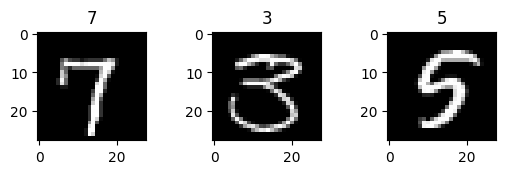

In [433]:
#Convert train datset to (num_images, img_rows, img_cols) format 
X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [434]:
#expand 1 more dimention as 1 for colour channel gray
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_train.shape

(42000, 28, 28, 1)

In [435]:
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape

(28000, 28, 28, 1)

In [436]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

In [437]:
print(mean_px, std_px)

33.408936 78.67759


In [438]:
#from keras.utils.np_utils import to_categorical
from keras.utils import to_categorical
#Y_train = to_categorical(Y_train, num_classes=10)
y_train = to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

C:\Python311\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


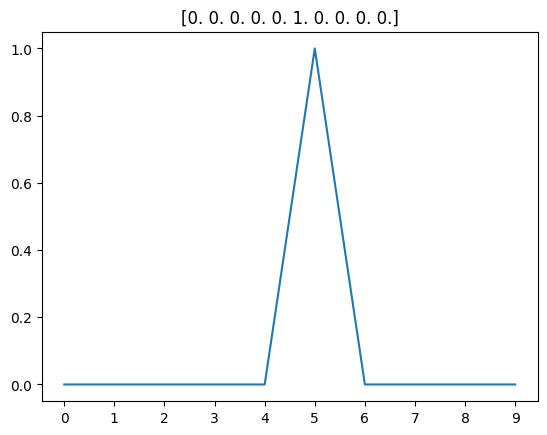

In [439]:
plt.title(y_train[8])
plt.plot(y_train[8])
plt.xticks(range(10));

## Design NN arch

In [440]:
from keras.layers import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D
from keras.optimizers import RMSprop
from keras import regularizers

from keras.models import  Sequential
model = Sequential()

model.add(Convolution2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())

model.add(Convolution2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(BatchNormalization())

model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(10, activation ='softmax'))

In [356]:
# # fix random seed for reproducibility
# seed = 42
# np.random.seed(seed)

In [357]:
# from keras.models import  Sequential
# #import keras.layers
# from keras.layers import  Lambda , Dense, Flatten, Dropout
# from keras.callbacks import EarlyStopping
# from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

In [358]:
# model= Sequential()
# model.add(Lambda(standardize,input_shape=(28,28,1)))
# model.add(Flatten())
# model.add(Dense(10, activation='softmax'))
# print("input shape ",model.input_shape)
# print("output shape ",model.output_shape)

In [441]:
from keras.optimizers import RMSprop
# check other optimizers (like Adam)
model.compile(optimizer=RMSprop(lr=0.001), # 0.001 = default learning rate
 loss='categorical_crossentropy',
 metrics=['accuracy'])

#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [442]:
# data augmentation
from keras.preprocessing import image
gen = image.ImageDataGenerator()
gen = ImageDataGenerator(
        #rotation_range=10,
        #zoom_range=0.1,
        rotation_range=3,
        zoom_range=0.1,
        #zoom_range=[0.85,1.15],
        #brightness_range=[0.7,1.3],
        width_shift_range=0.05,
        height_shift_range=0.05
        )

In [443]:
from sklearn.model_selection import train_test_split
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
#batches = gen.flow(X_train, y_train, batch_size=64)
#val_batches=gen.flow(X_val, y_val, batch_size=64)
train_gen = gen.flow(X_train, y_train, batch_size=64)
#train_gen_all = gen.flow(X, y, batch_size=64)
X.shape, y.shape, X_train.shape, X_val.shape, y_train.shape, y_val.shape

((42000, 28, 28, 1),
 (42000, 10),
 (33600, 28, 28, 1),
 (8400, 28, 28, 1),
 (33600, 10),
 (8400, 10))

In [ ]:
history = model.fit(train_gen, epochs=5, validation_data = (X_val, y_val), verbose=1)
#history = model.fit(train_gen_all, epochs=5, verbose=1)


# history=model.fit(generator=batches, steps_per_epoch=len(X_train)//64, epochs=5, 
#                     validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/5
 28/525 [>.............................] - ETA: 23:58 - loss: 1.6044 - accuracy: 0.4872

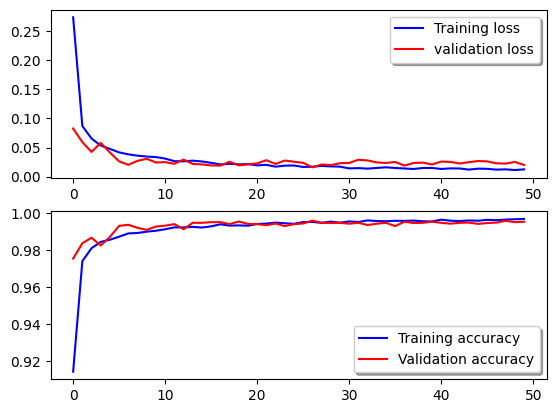

In [421]:
# Evaluate the model
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [20]:
#model.summary()

In [230]:
# history_dict = history.history
# history_dict.keys()

In [140]:
#history_dict['val_loss']

In [232]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# loss_values = history_dict['loss']
# val_loss_values = history_dict['val_loss']
# epochs = range(1, len(loss_values) + 1)

# # "bo" is for "blue dot"
# plt.plot(epochs, loss_values, 'bo')
# # b+ is for "blue crosses"
# plt.plot(epochs, val_loss_values, 'b+')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')

# plt.show()

In [231]:
# plt.clf()   # clear figure
# acc_values = history_dict['accuracy']
# val_acc_values = history_dict['val_accuracy']

# plt.plot(epochs, acc_values, 'bo')
# plt.plot(epochs, val_acc_values, 'b+')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')

# plt.show()

In [25]:
# def get_fc_model():
#     model = Sequential([
#         Lambda(standardize, input_shape=(28,28,1)),
#         Flatten(),
#         Dense(512, activation='relu'),
#         Dense(10, activation='softmax')
#         ])
#     model.compile(optimizer='Adam', loss='categorical_crossentropy',
#                   metrics=['accuracy'])
#     return model

In [ ]:
# fc = get_fc_model()
# fc.optimizer.lr=0.01

In [ ]:
# history=fc.fit_generator(generator=batches, steps_per_epoch=len(X_train)//64, epochs=10, 
#                     validation_data=val_batches, validation_steps=val_batches.n)

In [ ]:
# from keras.layers import Convolution2D, MaxPooling2D

# def get_cnn_model():
#     model = Sequential([
#         Lambda(standardize, input_shape=(28,28,1)),
#         Convolution2D(32,(3,3), activation='relu'),
#         Convolution2D(32,(3,3), activation='relu'),
#         MaxPooling2D(),
#         Convolution2D(64,(3,3), activation='relu'),
#         Convolution2D(64,(3,3), activation='relu'),
#         MaxPooling2D(),
#         Flatten(),
#         Dense(512, activation='relu'),
#         Dense(10, activation='softmax')
#         ])
#     model.compile(Adam(), loss='categorical_crossentropy',
#                   metrics=['accuracy'])
#     return model

In [ ]:
# model= get_cnn_model()
# model.optimizer.lr=0.01

In [ ]:
# history=model.fit_generator(generator=batches, steps_per_epoch=len(X_train)//64, epochs=10, 
#                     validation_data=val_batches, validation_steps=val_batches.n)

In [ ]:
# gen =ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
#                                height_shift_range=0.08, zoom_range=0.08)
# batches = gen.flow(X_train, y_train, batch_size=64)
# val_batches = gen.flow(X_val, y_val, batch_size=64)

In [ ]:
# model.optimizer.lr=0.001
# history=model.fit_generator(generator=batches, steps_per_epoch=len(X_train)//64, epochs=10, 
#                     validation_data=val_batches, validation_steps=val_batches.n)

In [ ]:
# x_val = x_train[:10000]
# partial_x_train = x_train[10000:]

# y_val = y_train[:10000]
# partial_y_train = y_train[10000:]

# history = model.fit(partial_x_train,
#                     partial_y_train,
#                     epochs=10,
#                     batch_size=64,
#                     validation_data=(x_val, y_val),
#                     verbose=1)

In [108]:
# from keras.layers import BatchNormalization

# def get_bn_model():
#     model = Sequential([
#         Lambda(standardize, input_shape=(28,28,1)),
#         Convolution2D(32,(3,3), activation='relu'),
#         BatchNormalization(axis=1),
#         Convolution2D(32,(3,3), activation='relu'),
#         MaxPooling2D(),
#         BatchNormalization(axis=1),
#         Convolution2D(64,(3,3), activation='relu'),
#         BatchNormalization(axis=1),
#         Convolution2D(64,(3,3), activation='relu'),
#         MaxPooling2D(),
#         Flatten(),
#         BatchNormalization(),
#         Dense(512, activation='relu'),
#         BatchNormalization(),
#         Dense(10, activation='softmax')
#         ])
#     model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

In [39]:
# model = get_bn_model()
# model.optimizer.lr=0.01
# history=model.fit(generator=train_gen, epochs=10, validation_data=(X_val, y_val), verbose=1)

# history = model.fit(train_gen, epochs=50, validation_data = (X_val, y_val), verbose=1)

In [86]:
# model.optimizer.lr=0.01
# gen = image.ImageDataGenerator()
# batches = gen.flow(X, y, batch_size=64)
# history=model.fit(generator=batches, steps_per_epoch=len(X_train)//64, epochs=10)

In [422]:
predictions = model.predict(X_test)

875/875 [==============================] - 35s 40ms/step


In [423]:
predictions = pd.DataFrame(predictions)

In [424]:
result = np.argmax(predictions, axis=1)
result = pd.DataFrame(result)
result.head()

,0
0,2
1,0
2,9
3,0
4,3


In [425]:
df_test = pd.read_csv('sample_submission.csv')
df_test = pd.concat([df_test, result],axis=1)
df_test = df_test.drop(columns=['Label'])
df_test = df_test.rename(columns = {0:'Label'})
df_test = df_test[['ImageId', 'Label']]
df_test

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [426]:
df_test.to_csv('Model2a_50epoch_acc_0.9954.csv', index=False)